# Importing Dataset

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Data Inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# One Hot Encoding

In [4]:
df = pd.get_dummies(df)
df.head()

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,Polyphagia_Yes,Genital thrush_No,Genital thrush_Yes,visual blurring_No,visual blurring_Yes,Itching_No,Itching_Yes,Irritability_No,Irritability_Yes,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,class_Negative,class_Positive
0,40,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1
1,58,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1
2,41,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
3,45,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1
4,60,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


Such features from Gender to Class are binary (Male or Female, Yes or No, or Positive or Negative).

Thus let's remove such all columns ending with No or Negative.

In [5]:
for col in df.columns: 
    if '_No' in col: 
        del df[col]
df

,Age,Gender_Female,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Negative,class_Positive
0,40,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1
1,58,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,41,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,45,0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1
4,60,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1
516,48,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1
517,58,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1
518,32,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0


In [6]:
for col in df.columns: 
    if '_Female' in col: 
        del df[col]
df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Negative,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0


In [7]:
for col in df.columns: 
    if '_Negative' in col: 
        del df[col]
df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     520 non-null    int64
 1   Gender_Male             520 non-null    uint8
 2   Polyuria_Yes            520 non-null    uint8
 3   Polydipsia_Yes          520 non-null    uint8
 4   sudden weight loss_Yes  520 non-null    uint8
 5   weakness_Yes            520 non-null    uint8
 6   Polyphagia_Yes          520 non-null    uint8
 7   Genital thrush_Yes      520 non-null    uint8
 8   visual blurring_Yes     520 non-null    uint8
 9   Itching_Yes             520 non-null    uint8
 10  Irritability_Yes        520 non-null    uint8
 11  delayed healing_Yes     520 non-null    uint8
 12  partial paresis_Yes     520 non-null    uint8
 13  muscle stiffness_Yes    520 non-null    uint8
 14  Alopecia_Yes            520 non-null    uint8
 15  Obesity_Yes            

In [9]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Wall time: 1min 26s


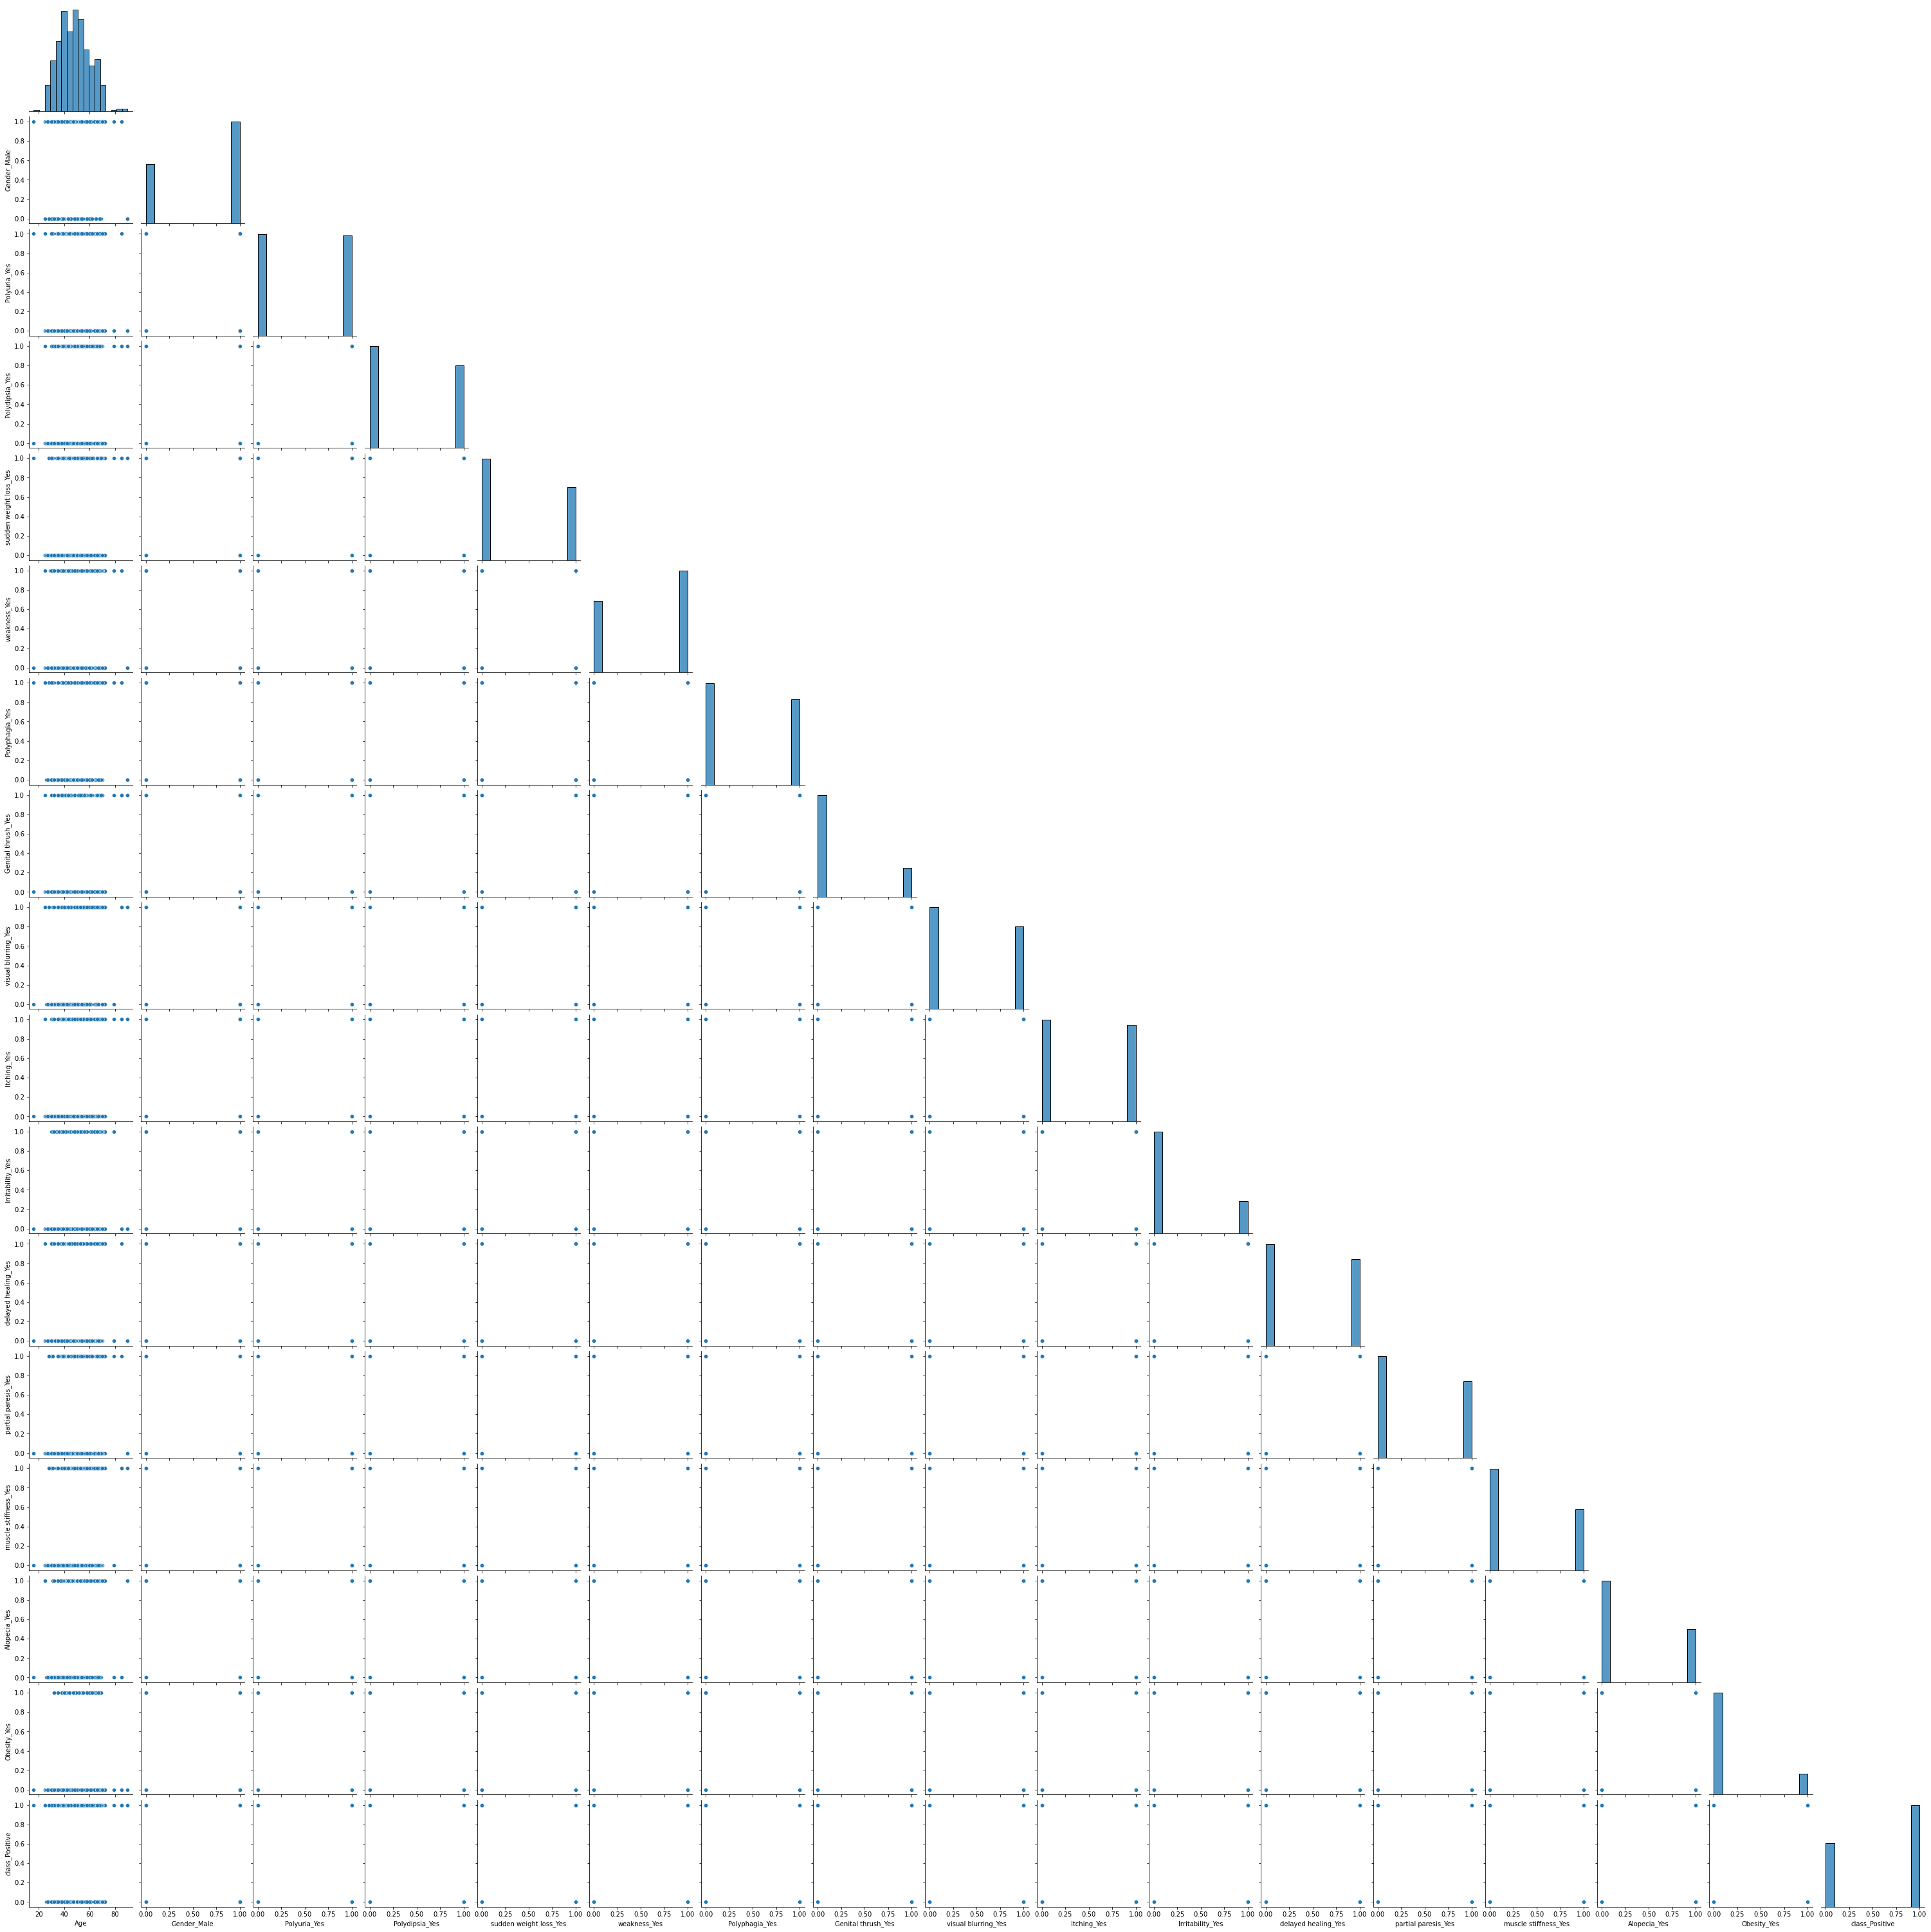

In [10]:
%%time
sns.pairplot(df, corner=True);

In [11]:
df.columns

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive'],
      dtype='object')

Wall time: 0 ns


C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

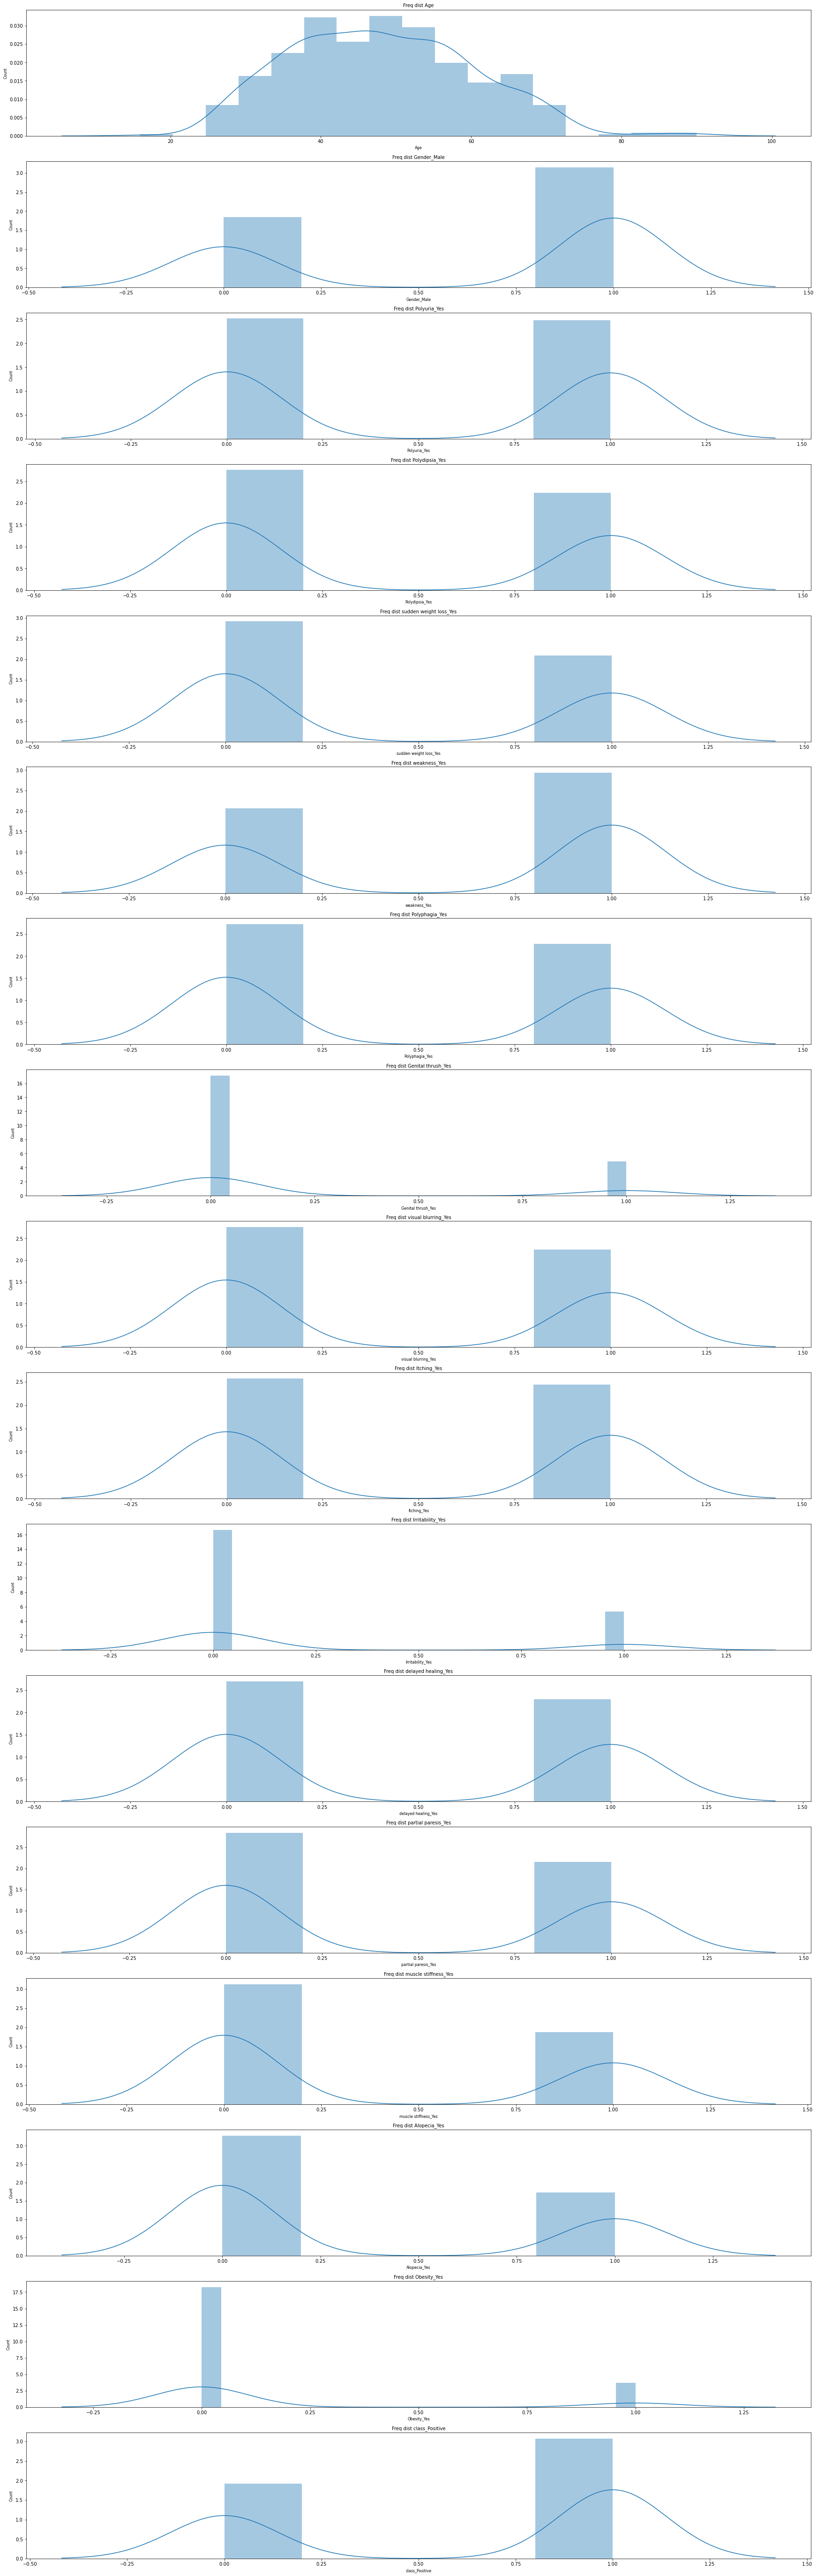

In [12]:
%time
col_names = ['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive']

fig, ax = plt.subplots(len(col_names), figsize=(30,100))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show();

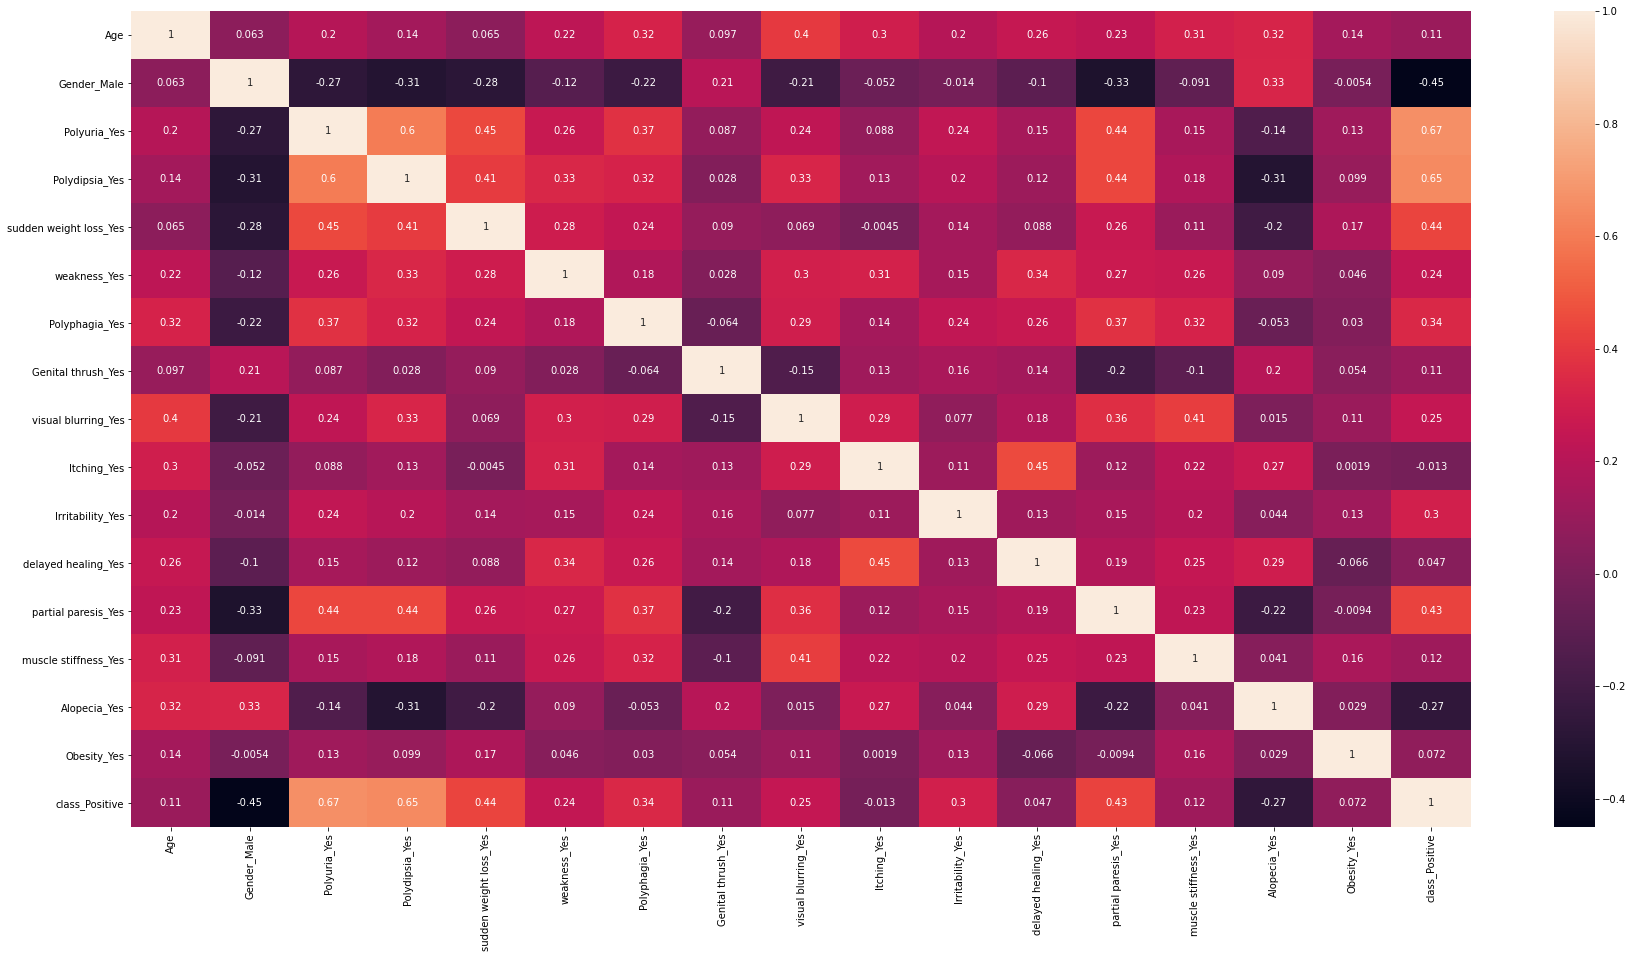

In [13]:
f, ax = plt.subplots(figsize=(30, 15))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True);

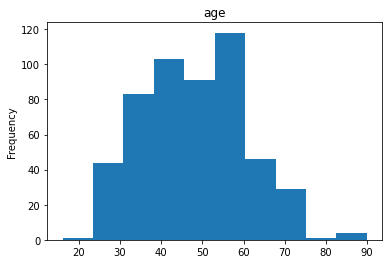

In [14]:
df.Age.plot.hist(title='age');

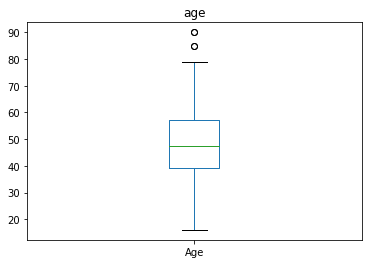

In [15]:
df.Age.plot.box(title='age');

# Remove Outliers by using IsolationForest.

In [16]:
%%time
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.004), 
                    max_features=1.0, bootstrap=False, n_jobs=-1,
                    random_state=42, verbose=0,behaviour="new")
# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf.fit(df)
pred = clf.predict(df)
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

C:\Users\danie\Anaconda\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


 1    518
-1      2
Name: anomaly, dtype: int64
Wall time: 16.3 s


In [17]:
df[df['anomaly']==-1]

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive,anomaly
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,-1
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,-1


Let's drop rows whose 'anomaly' value is -1.

In [18]:
df.drop(df[df['anomaly']==-1].index, inplace=True)

Let's drop the column, 'anomaly'.

In [19]:
df.drop(['anomaly'], axis = 1, inplace=True)

Let's makes features as X and target as y.

In [20]:
X = df.drop('class_Positive', axis=1)
y = df['class_Positive'].values

In [21]:
df = df.astype('int')

# Split train test data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree Classifier with RandomizedSearchCV

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
rt = DecisionTreeClassifier()
rt.fit(X_train, y_train)

DecisionTreeClassifier()

# CART Decision Tree Classifier Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.11597
Feature: 1, Score: 0.10387
Feature: 2, Score: 0.41715
Feature: 3, Score: 0.05980
Feature: 10, Score: 0.08624
Feature: 13, Score: 0.05467
Feature: 14, Score: 0.06509


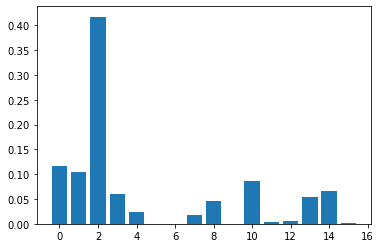

In [25]:
%time
importance = rt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [27]:
X_train.columns[[0,1,2,3,10,13,14]]

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'Irritability_Yes', 'muscle stiffness_Yes', 'Alopecia_Yes'],
      dtype='object')

In [28]:
X1 = df[['Age','Gender_Male','Polyuria_Yes', 'Polydipsia_Yes', 'Irritability_Yes','muscle stiffness_Yes','Alopecia_Yes']]

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [30]:
rt.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
%time
params = {'criterion' :['gini', 'entropy'],
          'splitter' : ['best', 'random'],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None],
          'random_state' : [42],
          'class_weight' : ['balanced', None]}

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1)
                    #, cv=2, n_iter=10)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9586746586746587
Best Hyperparameters::
{'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'gini', 'class_weight': 'balanced'}


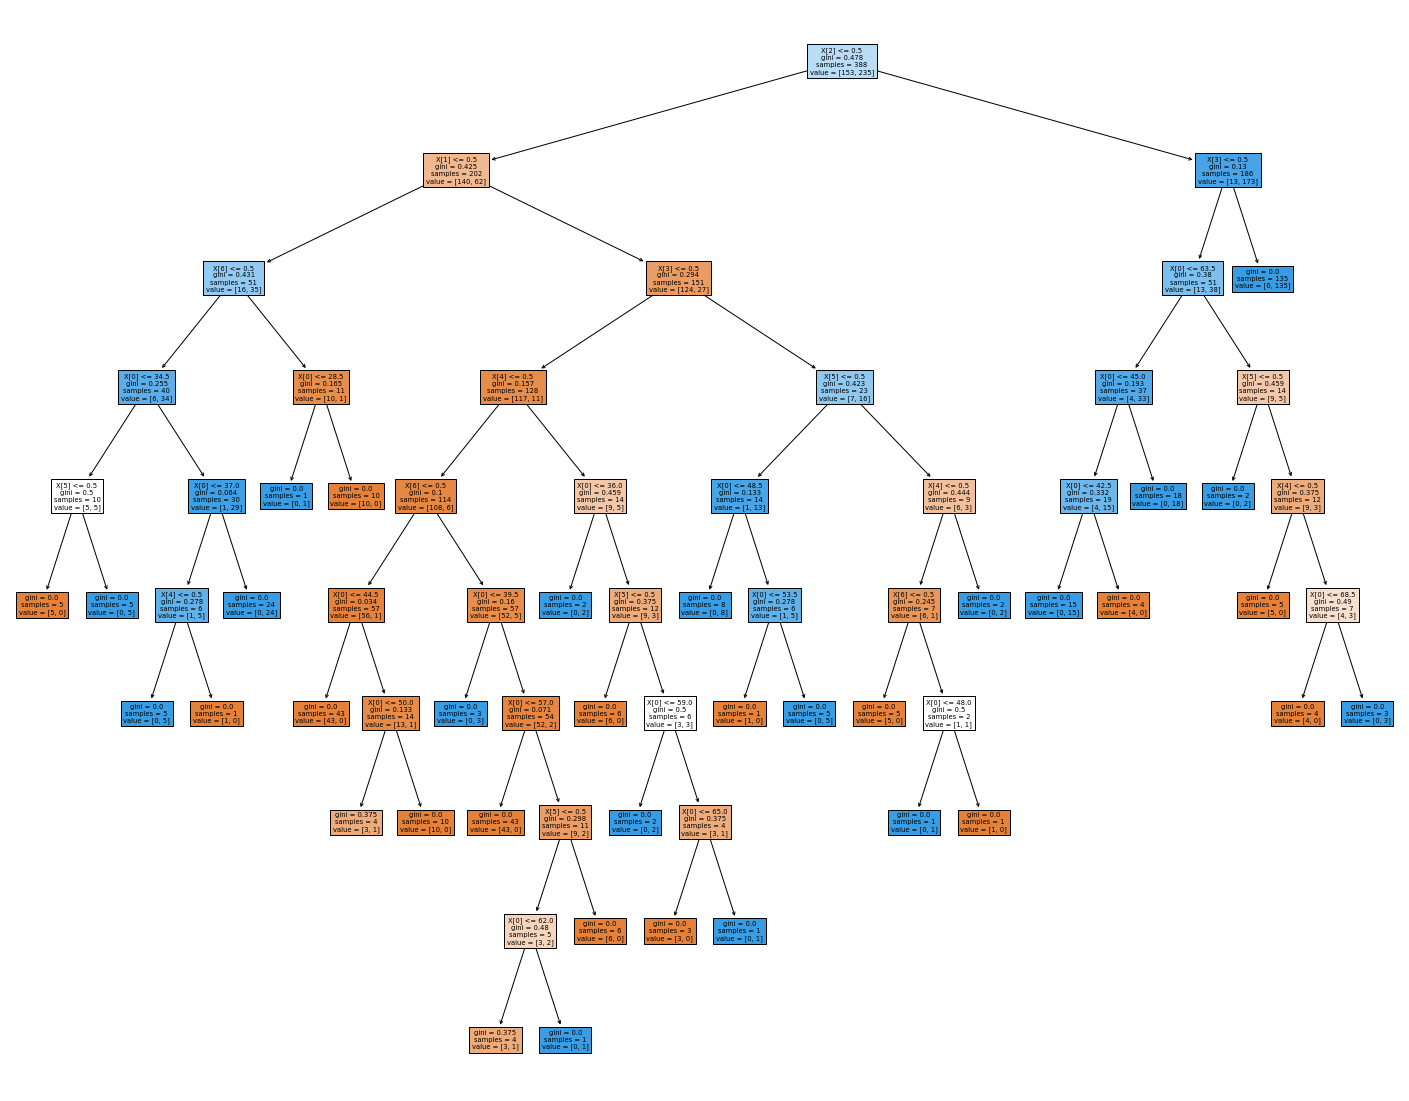

In [33]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rt,filled=True)

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# CART Random Forest Classifier Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.10294
Feature: 1, Score: 0.08589
Feature: 2, Score: 0.21292
Feature: 3, Score: 0.18012
Feature: 4, Score: 0.05872
Feature: 12, Score: 0.06138


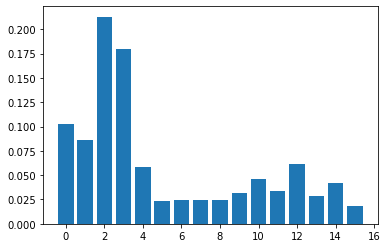

In [37]:
%time
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [38]:
X_train.columns[[0,1,2,3,4,10,12]]

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'Irritability_Yes', 'partial paresis_Yes'],
      dtype='object')

In [39]:
X1 = df[['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'sudden weight loss_Yes', 'Irritability_Yes', 'partial paresis_Yes']]

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [41]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
%time
params = {'n_estimators' : [120,300,500,800,1200],
          'criterion' :['gini', 'entropy'],        
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [2,5,10,15,100],
          'min_samples_leaf' : [2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None],
          'class_weight' : ['balanced', 'balanced_subsample', None]}

random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1)
                    #, cv=2, n_iter=10)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9382950382950384
Best Hyperparameters::
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 25, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [49]:
from sklearn import ensemble

In [50]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [51]:
params_ = {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 25, 'criterion': 'entropy', 'class_weight': 'balanced'}

In [53]:
reg = ensemble.RandomForestClassifier(**params_)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0692


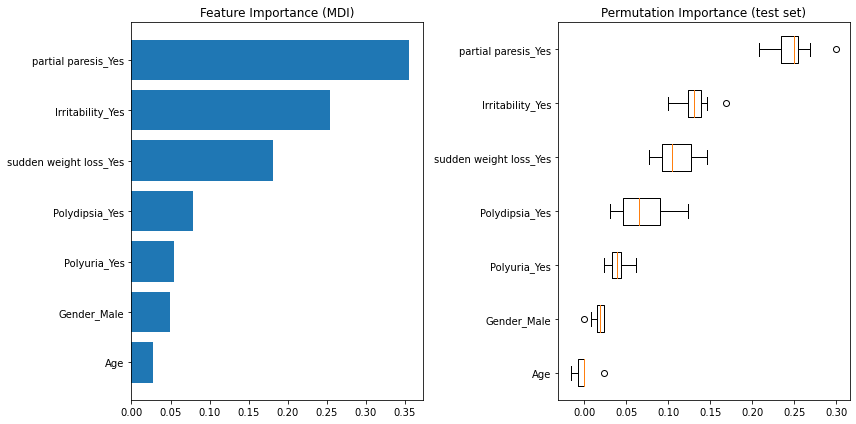

In [54]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'sudden weight loss_Yes', 'Irritability_Yes', 'partial paresis_Yes'])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'sudden weight loss_Yes', 'Irritability_Yes', 'partial paresis_Yes'])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Gradient Boost Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

# CART Gradient Boost Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.07824
Feature: 1, Score: 0.11035
Feature: 2, Score: 0.30966
Feature: 3, Score: 0.25009
Feature: 10, Score: 0.06398
Feature: 14, Score: 0.06640


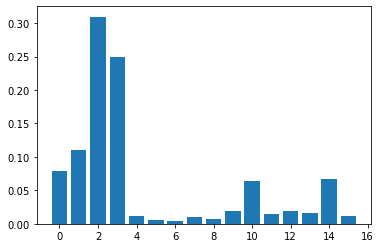

In [57]:
%time
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [58]:
X_train.columns[[0,1,2,3,10,14]]

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'Irritability_Yes', 'Alopecia_Yes'],
      dtype='object')

In [59]:
X1 = df[['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Irritability_Yes', 'Alopecia_Yes']]

In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [61]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [62]:
%time
params = {'loss' : ['deviance', 'exponential'],
          'n_estimators' : [120,300,500,800,1200],
          'criterion' :['friedman_mse', 'mse', 'mae'],          
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None]}

random_search_cv = RandomizedSearchCV(gb, params, n_jobs=-1)
                    
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9535131535131534
Best Hyperparameters::
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 5, 'loss': 'deviance', 'criterion': 'mse'}


In [64]:
params_ = {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 5, 'loss': 'deviance', 'criterion': 'mse'}

In [65]:
reg = ensemble.GradientBoostingClassifier(**params_)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0308


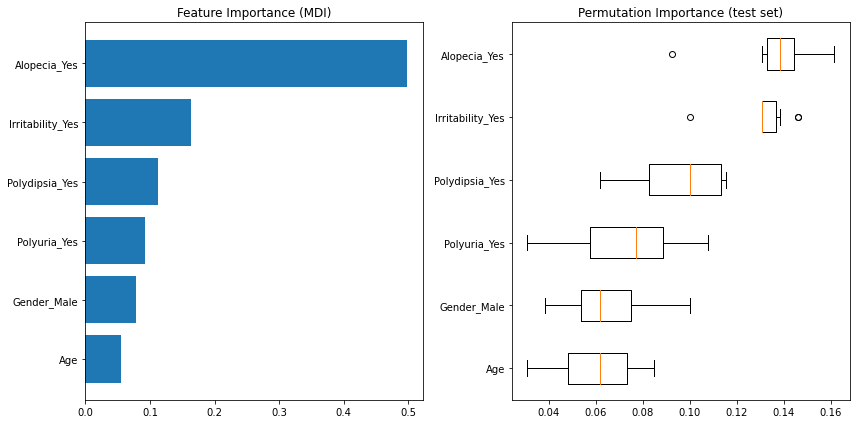

In [68]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Irritability_Yes', 'Alopecia_Yes'])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Irritability_Yes', 'Alopecia_Yes'])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()